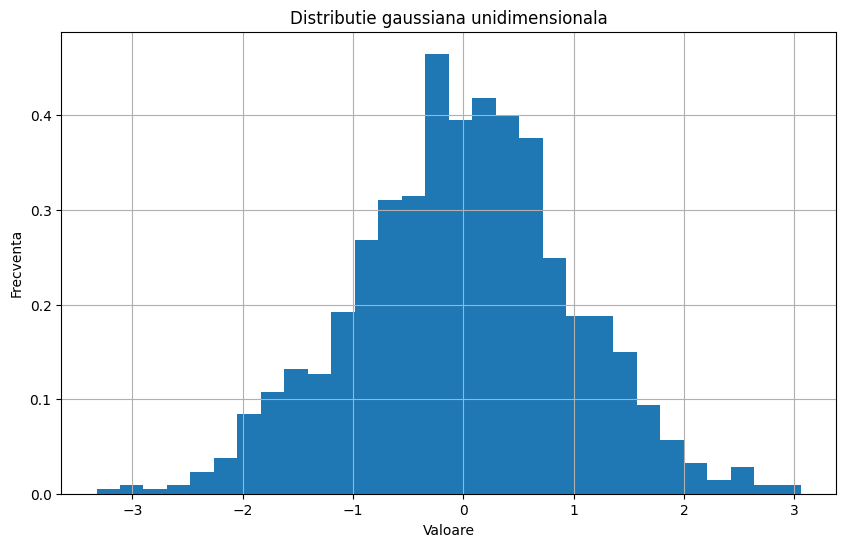

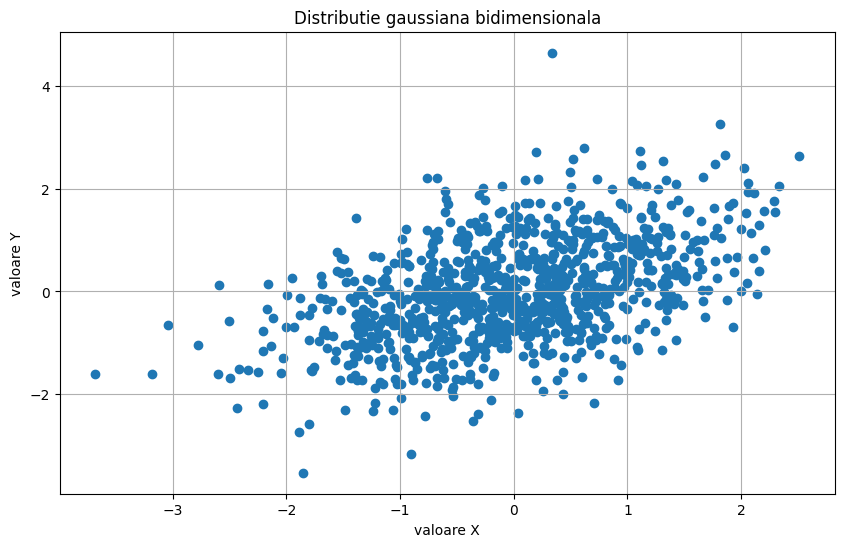

In [13]:
#ex1

import numpy as np
import matplotlib.pyplot as plt

# Distributie Gaussiana unidimensionala
mean_1d = 0  # media
std_dev_1d = 1  # deviatia standard
samples_1d = np.random.normal(mean_1d, std_dev_1d, 1000)

# Plottam distributia Gaussiana unidimensionala
plt.figure(figsize=(10, 6))
plt.hist(samples_1d, bins=30, density=True)
plt.title("Distributie gaussiana unidimensionala")
plt.xlabel("Valoare")
plt.ylabel("Frecventa")
plt.grid(True)
plt.show()

# Distributie Gaussiana bidimensionala
# Folosesc o matrice de covarianta luata de pe Wikipedia
mean_2d = [0, 0]  # vectorul medie
cov_matrix_2d = [[1, 0.5], [0.5, 1]]  # matricea de covarianta
samples_2d = np.random.multivariate_normal(mean_2d, cov_matrix_2d, 1000)

# Plottam distributia Gaussiana bidimensionala
plt.figure(figsize=(10, 6))
plt.scatter(samples_2d[:, 0], samples_2d[:, 1])
plt.title("Distributie gaussiana bidimensionala")
plt.xlabel("valoare X")
plt.ylabel("valoare Y")
plt.grid(True)
plt.show()

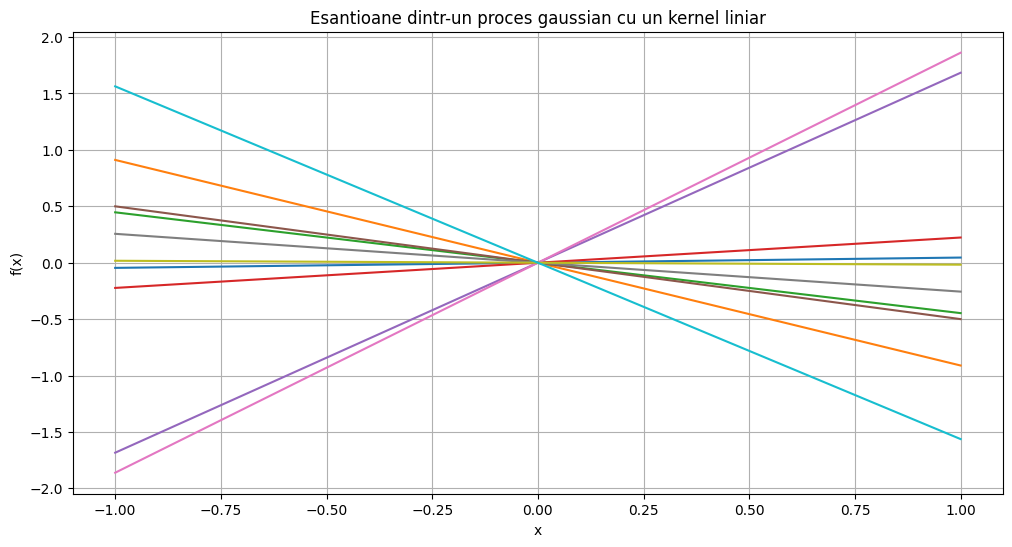

In [12]:
#ex2

import numpy as np
import matplotlib.pyplot as plt

# Definim functia liniara kernel
def linear_kernel(x, y):
    return np.outer(x, y)

# Definim un range de valori pentru x
x = np.linspace(-1, 1, 100)

# Generam esantioane dintr-un proces gassian cu un kernel liniar
# functia medie e 0, deci folosim doar functia de covarianta pentru a genera esantioana
cov_matrix = linear_kernel(x, x)
mean = np.zeros(len(x))

# facem multiple esantioane din procesul gaussian
n_samples = 10
samples = np.random.multivariate_normal(mean, cov_matrix, n_samples)

# Plottam esantioanele
plt.figure(figsize=(12, 6))
for i in range(n_samples):
    plt.plot(x, samples[i])  # aici plotam fara puncte

plt.title("Esantioane dintr-un proces gaussian cu un kernel liniar")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

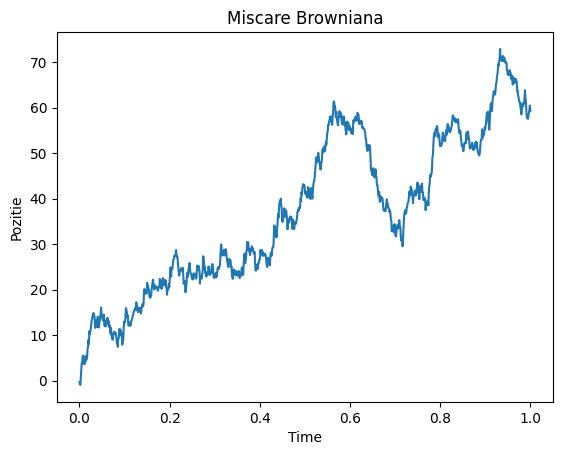

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Setăm numărul de pași
num_steps = 1000

# Generăm pașii aleatori. np.cumsum returnează suma cumulativă a elementelor.
# np.random.randn generează numere aleatoare din distribuția normală standard.
steps = np.cumsum(np.random.randn(num_steps))

# Creăm un array de timp de la 0 la 1 cu num_steps de puncte.
t = np.linspace(0, 1, num_steps)

# Desenăm graficul
plt.plot(t, steps)
plt.xlabel('Time')
plt.ylabel('Pozitie')
plt.title('Miscare Browniana')
plt.show()

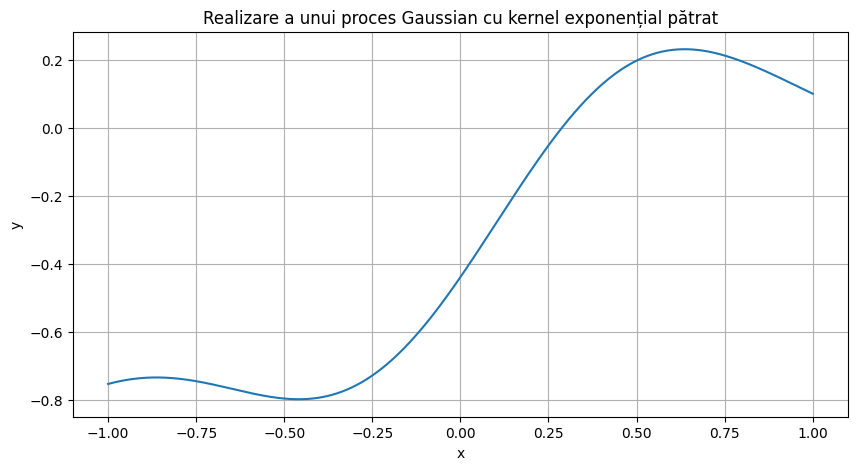

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Setăm lungimea scării pentru kernelul exponențial pătrat
alpha = 1.0

# Funcția kernel
def exponential_squared_kernel(a, b, param):
    """ Calculează kernelul exponențial pătrat între vectorii a și b cu parametrul alpha """
    square_diff = np.sum(a**2, 1).reshape(-1, 1) + np.sum(b**2, 1) - 2 * np.dot(a, b.T)
    return np.exp(-param * square_diff)

# Setăm punctele pentru care dorim să calculăm valorile GP
x_points = np.linspace(-1, 1, 1000).reshape(-1, 1)

# Calculăm matricea de covarianță folosind kernelul exponențial pătrat
covariance_matrix = exponential_squared_kernel(x_points, x_points, alpha)

# Generăm realizările procesului Gaussian
y_points = np.random.multivariate_normal(mean=np.zeros(1000), cov=covariance_matrix)

# Plotăm realizarea
plt.figure(figsize=(10, 5))
plt.plot(x_points, y_points)
plt.title('Realizare a unui proces Gaussian cu kernel exponențial pătrat')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


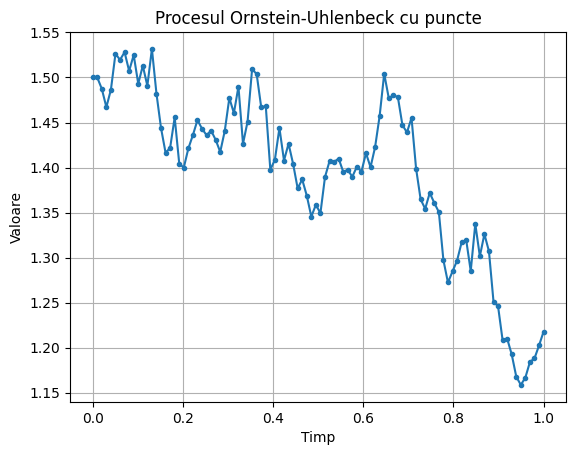

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parametrii procesului Ornstein-Uhlenbeck
theta = 0.15  # Rata de revenire la medie
mu = 0.0      # Media de revenire
sigma = 0.3   # Volatilitatea procesului
dt = 0.01     # Pasul de timp
T = 1         # Timpul total
n = int(T / dt)  # Numărul de pași de timp
initial_value = 1.5  # Valoarea inițială a procesului

# Inițializăm traiectoria procesului Ornstein-Uhlenbeck cu valoarea inițială
t = np.linspace(0, T, n)
x = np.empty(n)
x[0] = initial_value

# Generăm traiectoria procesului Ornstein-Uhlenbeck
for i in range(1, n):
    x[i] = x[i-1] + theta * (mu - x[i-1]) * dt + sigma * np.sqrt(dt) * np.random.normal()

# Plotăm traiectoria cu puncte
plt.plot(t, x, '-o', markersize=3)  # Adăugăm opțiunea '-o' pentru a pune puncte pe grafic
plt.title('Procesul Ornstein-Uhlenbeck cu puncte')
plt.xlabel('Timp')
plt.ylabel('Valoare')
plt.grid(True)  # Adăugăm grila pentru a facilita citirea graficului
plt.show()
